In [1]:
import random
import timeit
from collections.abc import Sequence
import pandas as pd

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

On a hunch, I made two separate cases in this implementation of _mean_. I wanted to support any iterable, which the second case does. But, if we have a _len_ method, we can use the built-in _sum_ function.

In [3]:
def mean(a):
    if isinstance(a, Sequence):
        return sum(a)/float(len(a))
    else:
        s = n = 0
        for x in a:
            s += x
            n += 1
        return s/float(n)

1st case

In [4]:
mean([random.random() for i in range(100000)])

0.5010230416561832

2nd case

In [5]:
mean(random.random() for i in range(100000))

0.4990815515554537

But, is it really worth it to have a separate implementation of the mean function for [Sequences](https://docs.python.org/3/library/collections.abc.html)? Let's try it and see.

In [6]:
def mean_loop(a):
    s = n = 0
    for x in a:
        s += x
        n += 1
    return s/float(n)

def mean_seq(a):
    return sum(a)/float(len(a))

In [7]:
n=1000
sizes = [1000,2000,3000,5000,10000,20000,50000,70000,100000]
cases = [('loop',  'mean_loop(a)'),
         ('sum',   'mean_seq(a)'),
         ('if',    'mean(a)')]
df = pd.DataFrame(index=sizes, columns=('sizes',)+tuple(key for key,cmd in cases))
df.sizes = sizes

Now, time a bunch of runs of the mean function on sequences of different sizes. This takes 30 seconds or so.

In [8]:
for size in sizes:
    a = tuple(random.random() for i in range(size))
    for key, cmd in cases:
        t = timeit.timeit(cmd, number=n, globals=globals())
        df.set_value(size, key, t)
df

,sizes,loop,sum,if
1000,1000,0.0921272,0.00600786,0.00690552
2000,2000,0.192143,0.011381,0.0122312
3000,3000,0.271834,0.0170192,0.0208895
5000,5000,0.46201,0.033739,0.0492685
10000,10000,1.13335,0.078896,0.0770089
20000,20000,2.35542,0.10861,0.110705
50000,50000,4.60694,0.258446,0.270928
70000,70000,7.27327,0.56273,0.544876
100000,100000,10.0002,0.555258,0.606015


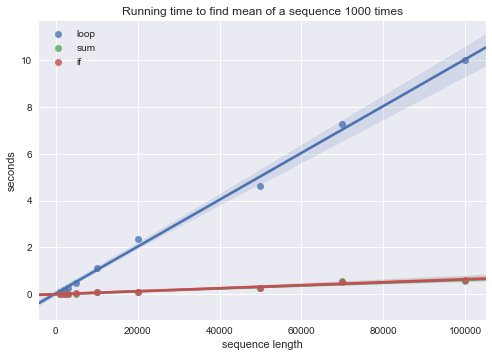

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.regplot(x='sizes', y='loop', data=df, label='loop')
ax = sns.regplot(x='sizes', y='sum', data=df, label='sum')
ax = sns.regplot(x='sizes', y='if', data=df, label='if')
plt.ylabel('seconds')
plt.xlabel('sequence length')
plt.title('Running time to find mean of a sequence {} times'.format(n))
plt.legend(loc='upper left')

For non-humongous sizes of sequences, both implementations will be practically instantaneous. But, we do see a substantial speedup percentage-wise, so why not get it if we can. 😁